<a href="https://colab.research.google.com/github/abiflynn/data_analysis_python/blob/main/data_exploration/groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping and aggregating data


In [1]:
import pandas as pd
import numpy as np

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
products_cl["Name Length"]= products_cl["name"].str.len()

In [4]:
(products_cl['name'].str.len() < 10)

0       False
1       False
2       False
3       False
4       False
        ...  
9987    False
9988    False
9989    False
9990    False
9991    False
Name: name, Length: 9992, dtype: bool

In [5]:
ol_df = orderlines_cl.copy()

In [6]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


Change `date` to datetime.

In [7]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

## 1.&nbsp; `.groupby` a single feature

In [8]:
ol_df.groupby("sku").count()

,id,id_order,product_id,product_quantity,unit_price,date
sku,,,,,,
8MO0001-A,2,2,2,2,2,2
8MO0003-A,3,3,3,3,3,3
8MO0007,29,29,29,29,29,29
8MO0008,30,30,30,30,30,30
8MO0009,28,28,28,28,28,28
...,...,...,...,...,...,...
ZAG0041,2,2,2,2,2,2
ZAG0042,1,1,1,1,1,1
ZEP0007,5,5,5,5,5,5


In [9]:
ol_df.shape

(216250, 7)

In [10]:
ol_df.groupby("sku").sum()

<ipython-input-10-ec0d4021f489>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ol_df.groupby("sku").sum()


,id,id_order,product_id,product_quantity,unit_price
sku,,,,,
8MO0001-A,2731953,813237,0,2,25.92
8MO0003-A,4893267,1557627,0,3,38.55
8MO0007,37205508,10794389,0,30,619.71
8MO0008,38188229,11034203,0,31,651.70
8MO0009,40281947,12270595,0,30,499.60
...,...,...,...,...,...
ZAG0041,3289730,1050270,0,2,39.98
ZAG0042,1641159,523690,0,1,19.99
ZEP0007,6423489,1858331,0,5,685.59


In [11]:
ol_df.groupby(["sku"])["product_quantity"].sum()

sku
8MO0001-A     2
8MO0003-A     3
8MO0007      30
8MO0008      31
8MO0009      30
             ..
ZAG0041       2
ZAG0042       1
ZEP0007       5
ZEP0008       1
par0072      13
Name: product_quantity, Length: 6798, dtype: int64

In [12]:
(
    ol_df
    .groupby(["sku"])["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

sku
APP1190      5576
APP0698      2337
WDT0183      1828
APP1922      1663
APP0927      1618
             ... 
PAC2241         1
JBL0156         1
PAC2237         1
TIG0018-A       1
APP0241-A       1
Name: product_quantity, Length: 6798, dtype: int64

In [13]:
ol_df.groupby(["sku"])

In [14]:
(
    ol_df
    .groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(5)
)

sku
APP1190    5576
APP0698    2337
WDT0183    1828
APP1922    1663
APP0927    1618
Name: product_quantity, dtype: int64

### 1.1.&nbsp; Aggregates


### 1.2.&nbsp; `.agg()`

#### 1.2.1.&nbsp; multiple aggregates for one column


In [15]:
(
    ol_df
    .groupby(["sku"])["product_quantity"]
    .agg(["sum", "count"])
    .nlargest(10, "sum")
)

,sum,count
sku,,
APP1190,5576,4306
APP0698,2337,1615
WDT0183,1828,1124
APP1922,1663,1560
APP0927,1618,1369
SAM0074,1346,1259
APP1970,1182,1007
APP1221,1131,1108
CRU0051,1122,948


#### 1.2.2.&nbsp; mutliple aggregates for more than one column

In [16]:
(
    ol_df
    .groupby(["sku"])
    .agg({"product_quantity": ["sum", "count"], "unit_price": "mean"})
    .nlargest(10, ("product_quantity", "sum"))
)

product_quantity        unit_price
                     sum count        mean
sku                                       
APP1190             5576  4306   56.014057
APP0698             2337  1615   10.116279
WDT0183             1828  1124  139.061770
APP1922             1663  1560  162.143968
APP0927             1618  1369   17.038773
SAM0074             1346  1259  152.823606
APP1970             1182  1007  362.970417
APP1221             1131  1108  106.131146
CRU0051             1122   948  140.734863
WDT0141             1048   671  109.266259

## 2.&nbsp; `.groupby()` multiple features

In [17]:
(
    ol_df
    .groupby([ol_df["date"].dt.year, 
              ol_df["date"].dt.month])["product_quantity"]
    .sum()
 )

date  date
2017  1       22363
      2       14616
      3       12443
      4       13781
      5       11665
      6       11221
      7       15347
      8       11530
      9       12213
      10      15387
      11      33082
      12      24455
2018  1       23810
      2       15831
      3        8067
Name: product_quantity, dtype: int64

### 1.4.&nbsp; `.groupby()` aggregate plotting


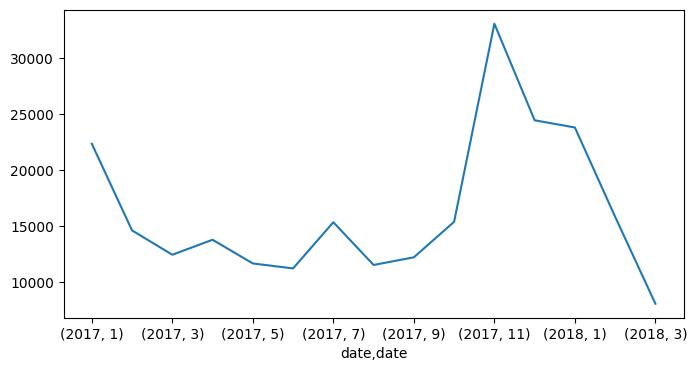

In [20]:
(
    ol_df.groupby([ol_df["date"].dt.year, 
                   ol_df["date"].dt.month])["product_quantity"]
    .sum()
    .plot(figsize=(8, 4))
);

## 3.&nbsp; `.resample()`


In [21]:
(
    ol_df
    .resample("M", on="date")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

date
2017-11-30    33082
2017-12-31    24455
2018-01-31    23810
2017-01-31    22363
2018-02-28    15831
2017-10-31    15387
2017-07-31    15347
2017-02-28    14616
2017-04-30    13781
2017-03-31    12443
2017-09-30    12213
2017-05-31    11665
2017-08-31    11530
2017-06-30    11221
2018-03-31     8067
Name: product_quantity, dtype: int64

<ipython-input-22-095d31663c56>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ol_df


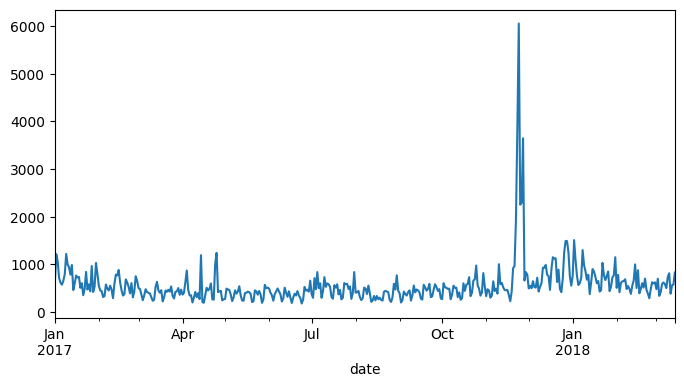

In [22]:
(
    ol_df
    .resample("D", on="date")
    .sum()["product_quantity"]
    .plot(figsize=(8, 4))
 );

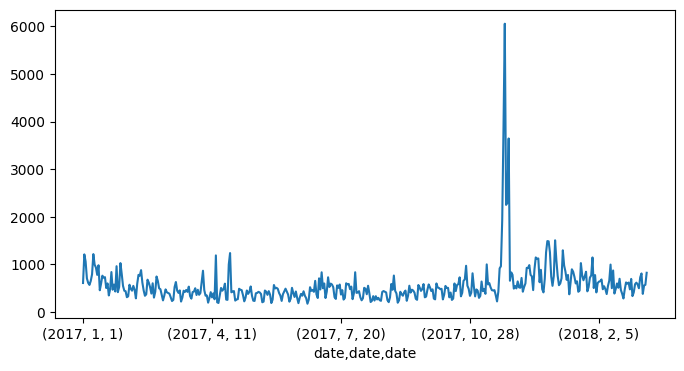

In [24]:
(
    ol_df
    .groupby([ol_df.date.dt.year, 
              ol_df.date.dt.month,
              ol_df.date.dt.day])["product_quantity"]
    .sum()
    .plot(figsize=(8, 4))
 );

# Challenges

## Challenge 1. What are the top 8 most sold products?

In [25]:
ol_df.groupby("sku")["product_quantity"].sum().nlargest(8)

sku
APP1190    5576
APP0698    2337
WDT0183    1828
APP1922    1663
APP0927    1618
SAM0074    1346
APP1970    1182
APP1221    1131
Name: product_quantity, dtype: int64

## Challenge 2. How many products did each of the 5 largest orders contain?

In [26]:
ol_df.groupby("id_order")["product_quantity"].sum().nlargest(5)

id_order
346221    999
349475    800
349133    555
335057    202
417536    200
Name: product_quantity, dtype: int64

## Challenge 3. We want to see how busy the days of the week are to know when we need more staff. Rank the days of the week from busiest to least busiest. 
Bonus points for using your pandas plotting skills.

In [27]:
o_test_df = orders_cl.copy()

In [28]:
o_test_df["created_date"] = pd.to_datetime(o_test_df["created_date"])

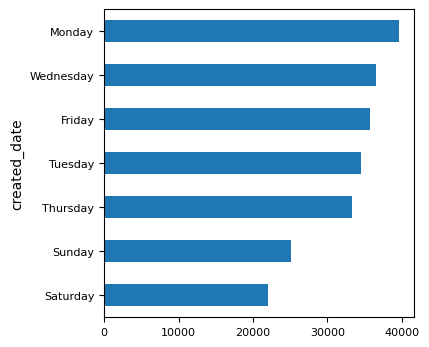

In [30]:
(
    o_test_df
    .groupby(o_test_df["created_date"].dt.day_name())["order_id"]
    .count()
    .sort_values()
    .plot
    .barh(figsize=(4,4), fontsize=8)
);

## Challenge 4. Which brands sell the most products?

In [31]:
orderlines_cl["brand"] = orderlines_cl["sku"].str[0:3]

In [32]:
orderlines_brands_df = orderlines_cl.merge(brands, how="left", left_on="brand", right_on="short")

In [33]:
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date,brand
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,OTT
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,LGE
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,PAR
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,WDT
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,JBL
...,...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,JBL
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,PAC
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,APP
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,BEZ


In [34]:
(
    orderlines_brands_df
    .groupby("long")["product_quantity"]
    .sum()
    .nlargest(10)
)

long
Apple              58210
OWC                12069
Western Digital     9821
Pack                8004
Crucial             7955
Belkin              7659
Wacom               7065
LaCie               6787
SanDisk             5351
Satechi             5096
Name: product_quantity, dtype: int64

## Challenge 5. Plot a line chart for the amount of orders each hour of November 2017

In [35]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])

In [36]:
november_2017_df = orders_cl.loc[orders_cl["created_date"].between("2017-11-01", "2017-11-30"), :]

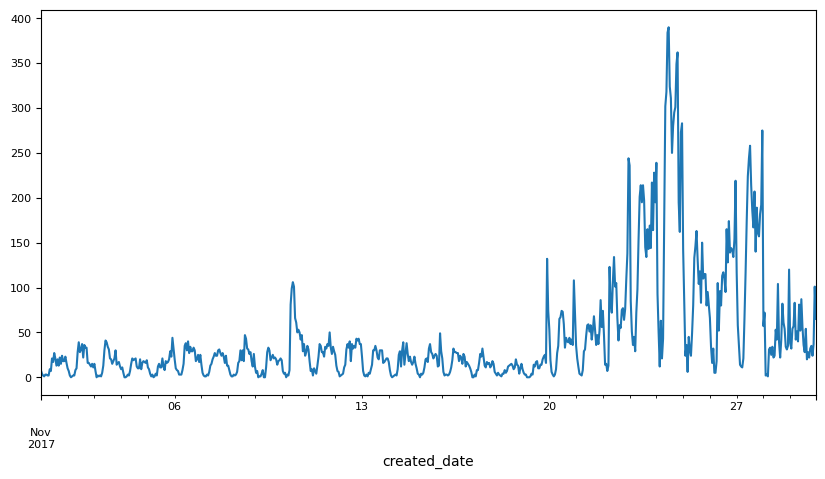

In [38]:
(
    november_2017_df
    .resample("1H", on="created_date")["order_id"]
    .count()
    .plot(figsize=(10, 5), fontsize=8)
);